In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\swiggy.csv")

In [4]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [5]:
df.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [6]:
nan_percentage = df.isna().mean() * 100
print(nan_percentage)

id              0.000000
name            0.057896
city            0.000000
rating          0.057896
rating_count    0.057896
cost            0.088191
cuisine         0.066648
lic_no          0.154166
link            0.000000
address         0.057896
menu            0.000000
dtype: float64


In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

In [9]:
df['city'].unique()

array(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra',
       'Vastrapur,Ahmedabad', 'GOTA,Ahmedabad',
       'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad',
       'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad',
       'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad',
       'Science City,Ahmedabad', 'Maninagar,Ahmedabad',
       'Chandkheda,Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola',
       'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Alwar',
       'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar',
       'Anand', 'Anantapur', 'Ankleshwar', 'Arakkonam', 'Arambagh',
       'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad',
       'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra',
       'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore',
       'Ballari', 'Balrampur', 'Balurghat', 'Banda',
       'Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore',
       'Koramangala,Bangalore', 'JP Nagar,B

In [10]:
cities_with_comma = [city for city in df['city'].unique() if ',' in city]
print(cities_with_comma)

['Vastrapur,Ahmedabad', 'GOTA,Ahmedabad', 'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad', 'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad', 'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad', 'Science City,Ahmedabad', 'Maninagar,Ahmedabad', 'Chandkheda,Ahmedabad', 'Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore', 'Koramangala,Bangalore', 'JP Nagar,Bangalore', 'Mahadevpura,Bangalore', 'HSR,Bangalore', 'Arekere,Bangalore', 'Indiranagar,Bangalore', 'Banashankari,Bangalore', 'Whitefield,Bangalore', 'Nagavara & Hennur,Bangalore', 'Kammanahalli/Kalyan Nagar,Bangalore', 'Kumaraswamy Layout & Uttarahalli,Bangalore', 'BTM,Bangalore', 'Battarahalli,Bangalore', 'Basaveshwaranagar,Bangalore', 'Frazer Town,Bangalore', 'Sanjay Nagar, New BEL Road,Bangalore', 'Yelahanka,Bangalore', 'Majestic,Bangalore', 'Kanakapura Road,Bangalore', 'R.T. Nagar,Bangalore', 'Kadugodi,Bangalore', 'Marathahalli,Bangalore', 'Rajarajeshwari Nagar,Bangalore', 'CV Raman Nagar,Bangalore', 'Electronic City

In [11]:
a = df['city'].str.split(',', n=1, expand=True).apply(lambda x: x.str.strip())

In [12]:
a

,0,1
0,Abohar,None
1,Abohar,None
2,Abohar,None
3,Abohar,None
4,Abohar,None
...,...,...
148536,Yavatmal,None
148537,Yavatmal,None
148538,Yavatmal,None
148539,Yavatmal,None


In [13]:
df['city'] = a[1].fillna(a[0])
df['place'] = a[0]

C:\Users\sures\AppData\Local\Temp\ipykernel_9988\492028025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = a[1].fillna(a[0])
C:\Users\sures\AppData\Local\Temp\ipykernel_9988\492028025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['place'] = a[0]


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148255 entries, 0 to 148540
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148255 non-null  int64 
 1   name          148255 non-null  object
 2   city          148255 non-null  object
 3   rating        148255 non-null  object
 4   rating_count  148255 non-null  object
 5   cost          148255 non-null  object
 6   cuisine       148255 non-null  object
 7   lic_no        148255 non-null  object
 8   link          148255 non-null  object
 9   address       148255 non-null  object
 10  menu          148255 non-null  object
 11  place         148255 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.7+ MB


In [16]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu,place
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,Abohar
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,Abohar
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Abohar
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,Abohar
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,Abohar
...,...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json,Yavatmal
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json,Yavatmal
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json,Yavatmal
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json,Yavatmal


In [17]:
df['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [18]:
# 1. Convert '--' in 'rating' to 0.0 and change dtype to float
df['rating'] = df['rating'].replace('--', 0.0).astype(float)

# 2. Convert 'rating_count' with random values based on your logic
def convert_rating_count(value):
    if value == 'Too Few Ratings':
        return 0
    elif '20+' in value:
        return np.random.randint(20, 50)
    elif '50+' in value:
        return np.random.randint(50, 100)
    elif '100+' in value:
        return np.random.randint(100, 500)
    elif '500+' in value:
        return np.random.randint(500, 1000)
    elif '1K+' in value:
        return np.random.randint(1000, 5000)
    elif '5K+' in value:
        return np.random.randint(5000, 10000)
    elif '10K+' in value:
        return np.random.randint(10000, 15000)
    else:
        return 0

df['rating_count'] = df['rating_count'].apply(convert_rating_count).astype(int)

# 3. Remove ₹ symbol and convert 'cost' to int
df['cost'] = df['cost'].str.replace('₹', '', regex=False).str.strip().astype(int)



C:\Users\sures\AppData\Local\Temp\ipykernel_9988\3605053823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].replace('--', 0.0).astype(float)
C:\Users\sures\AppData\Local\Temp\ipykernel_9988\3605053823.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_count'] = df['rating_count'].apply(convert_rating_count).astype(int)
C:\Users\sures\AppData\Local\Temp\ipykernel_9988\3605053823.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [19]:
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu,place
0,567335,AB FOODS POINT,Abohar,0.0,0,200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,Abohar
1,531342,Janta Sweet House,Abohar,4.4,65,200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,Abohar
2,158203,theka coffee desi,Abohar,3.8,227,100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Abohar
3,187912,Singh Hut,Abohar,3.7,26,250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,Abohar
4,543530,GRILL MASTERS,Abohar,0.0,0,250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,Abohar
...,...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,0.0,0,200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json,Yavatmal
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,0.0,0,300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json,Yavatmal
148538,559435,Cafe Bella Ciao,Yavatmal,0.0,0,300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json,Yavatmal
148539,418989,GRILL ZILLA,Yavatmal,0.0,0,250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json,Yavatmal


In [20]:
df.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu', 'place'],
      dtype='object')

In [21]:
# Convert string values in specified columns to lowercase and strip whitespace
for col in ['name', 'city', 'place', 'cuisine']:
    df[col] = df[col].str.strip().str.lower()

# Drop unnecessary columns
df.drop(columns=['lic_no', 'address', 'menu'], inplace=True)

# Move 'place' column before 'city'
cols = df.columns.tolist()
cols.insert(cols.index('city'), cols.pop(cols.index('place')))
df = df[cols]

# Optional: view the cleaned DataFrame
df.head()


C:\Users\sures\AppData\Local\Temp\ipykernel_9988\1118955522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.strip().str.lower()
C:\Users\sures\AppData\Local\Temp\ipykernel_9988\1118955522.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['lic_no', 'address', 'menu'], inplace=True)


,id,name,place,city,rating,rating_count,cost,cuisine,link
0,567335,ab foods point,abohar,abohar,0.0,0,200,"beverages,pizzas",https://www.swiggy.com/restaurants/ab-foods-po...
1,531342,janta sweet house,abohar,abohar,4.4,65,200,"sweets,bakery",https://www.swiggy.com/restaurants/janta-sweet...
2,158203,theka coffee desi,abohar,abohar,3.8,227,100,beverages,https://www.swiggy.com/restaurants/theka-coffe...
3,187912,singh hut,abohar,abohar,3.7,26,250,"fast food,indian",https://www.swiggy.com/restaurants/singh-hut-n...
4,543530,grill masters,abohar,abohar,0.0,0,250,"italian-american,fast food",https://www.swiggy.com/restaurants/grill-maste...


In [22]:
# Count the number of cuisines in each row
df['cuisine_count'] = df['cuisine'].apply(lambda x: len(x.split(',')))

# Find the maximum number of cuisines in any row
max_cuisines = df['cuisine_count'].max()

print("Maximum number of cuisines in any row:", max_cuisines)


Maximum number of cuisines in any row: 2


C:\Users\sures\AppData\Local\Temp\ipykernel_9988\1924139296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cuisine_count'] = df['cuisine'].apply(lambda x: len(x.split(',')))


In [23]:
df['cuisine_count']

0         2
1         2
2         1
3         2
4         2
         ..
148536    2
148537    1
148538    2
148539    1
148540    1
Name: cuisine_count, Length: 148255, dtype: int64

In [24]:
# Split the 'cuisine' column into two parts
df[['cuisine_1', 'cuisine_2']] = df['cuisine'].str.split(',', n=1, expand=True)

# If cuisine_2 is missing, copy cuisine_1 into it
df['cuisine_2'] = df['cuisine_2'].fillna(df['cuisine_1'])

# Optional: Drop the original 'cuisine' column
df.drop(columns=['cuisine'], inplace=True)

# Optional: Reorder columns if needed
df = df[['id', 'name', 'place', 'city', 'rating', 'rating_count', 'cost', 'cuisine_1', 'cuisine_2', 'link']]


C:\Users\sures\AppData\Local\Temp\ipykernel_9988\3154811112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['cuisine_1', 'cuisine_2']] = df['cuisine'].str.split(',', n=1, expand=True)
C:\Users\sures\AppData\Local\Temp\ipykernel_9988\3154811112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['cuisine_1', 'cuisine_2']] = df['cuisine'].str.split(',', n=1, expand=True)
C:\Users\sures\AppData\Local\Temp\ipykernel_9988\3154811112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [25]:
df

,id,name,place,city,rating,rating_count,cost,cuisine_1,cuisine_2,link
0,567335,ab foods point,abohar,abohar,0.0,0,200,beverages,pizzas,https://www.swiggy.com/restaurants/ab-foods-po...
1,531342,janta sweet house,abohar,abohar,4.4,65,200,sweets,bakery,https://www.swiggy.com/restaurants/janta-sweet...
2,158203,theka coffee desi,abohar,abohar,3.8,227,100,beverages,beverages,https://www.swiggy.com/restaurants/theka-coffe...
3,187912,singh hut,abohar,abohar,3.7,26,250,fast food,indian,https://www.swiggy.com/restaurants/singh-hut-n...
4,543530,grill masters,abohar,abohar,0.0,0,250,italian-american,fast food,https://www.swiggy.com/restaurants/grill-maste...
...,...,...,...,...,...,...,...,...,...,...
148536,553122,the food delight,yavatmal,yavatmal,0.0,0,200,fast food,snacks,https://www.swiggy.com/restaurants/the-food-de...
148537,562647,maitri foods & beverages,yavatmal,yavatmal,0.0,0,300,pizzas,pizzas,https://www.swiggy.com/restaurants/maitri-food...
148538,559435,cafe bella ciao,yavatmal,yavatmal,0.0,0,300,fast food,snacks,https://www.swiggy.com/restaurants/cafe-bella-...
148539,418989,grill zilla,yavatmal,yavatmal,0.0,0,250,continental,continental,https://www.swiggy.com/restaurants/grill-zilla...


In [26]:
output_path = r"C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\cleaned_data.csv"

df.to_csv(output_path, index=False)


In [27]:
df.columns

Index(['id', 'name', 'place', 'city', 'rating', 'rating_count', 'cost',
       'cuisine_1', 'cuisine_2', 'link'],
      dtype='object')

In [28]:
df = pd.read_csv(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\cleaned_data.csv')

# Backup original index
df.reset_index(drop=True, inplace=True)
df.head()

,id,name,place,city,rating,rating_count,cost,cuisine_1,cuisine_2,link
0,567335,ab foods point,abohar,abohar,0.0,0,200,beverages,pizzas,https://www.swiggy.com/restaurants/ab-foods-po...
1,531342,janta sweet house,abohar,abohar,4.4,65,200,sweets,bakery,https://www.swiggy.com/restaurants/janta-sweet...
2,158203,theka coffee desi,abohar,abohar,3.8,227,100,beverages,beverages,https://www.swiggy.com/restaurants/theka-coffe...
3,187912,singh hut,abohar,abohar,3.7,26,250,fast food,indian,https://www.swiggy.com/restaurants/singh-hut-n...
4,543530,grill masters,abohar,abohar,0.0,0,250,italian-american,fast food,https://www.swiggy.com/restaurants/grill-maste...


In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import joblib

# Select features for encoding and scaling
features = ['name', 'place', 'city', 'cuisine_1', 'cuisine_2', 'rating', 'rating_count', 'cost']
data = df[features].copy()

In [30]:
# Label Encode 'name'
label_encoder = LabelEncoder()
data['name_encoded'] = label_encoder.fit_transform(data['name'])
joblib.dump(label_encoder, r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\label_encoder_name.pkl')

['C:\\Users\\sures\\OneDrive\\Desktop\\from_tuf_gaming\\Swiggy_Recommendation_System\\swiggy_dataset\\label_encoder_name.pkl']

In [31]:
# One-Hot Encode categorical features
categorical_cols = ['place', 'city', 'cuisine_1', 'cuisine_2']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_data = ohe.fit_transform(data[categorical_cols])
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(categorical_cols))
joblib.dump(ohe, r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\ohe_encoder.pkl')

['C:\\Users\\sures\\OneDrive\\Desktop\\from_tuf_gaming\\Swiggy_Recommendation_System\\swiggy_dataset\\ohe_encoder.pkl']

In [32]:
# Scale numerical features
numerical_cols = ['rating', 'rating_count', 'cost', 'name_encoded']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)
joblib.dump(scaler, r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\scaler.pkl')

['C:\\Users\\sures\\OneDrive\\Desktop\\from_tuf_gaming\\Swiggy_Recommendation_System\\swiggy_dataset\\scaler.pkl']

In [33]:
# Combine all encoded data
final_encoded_df = pd.concat([ohe_df, scaled_df], axis=1)

# Add label encoded 'name' column
final_encoded_df['name_encoded'] = data['name_encoded'].values

# Save to CSV
final_encoded_df.to_csv(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\encoded_data.csv', index=False)
print("✅ Encoded and scaled data with 'name_encoded' saved to encoded_data.csv")

final_encoded_df

✅ Encoded and scaled data with 'name_encoded' saved to encoded_data.csv


,place_abids & koti,place_abohar,place_adajan,place_adilabad,place_adityapur,place_adoni,place_adyar,place_agartala,place_agra,place_ahmednagar,...,cuisine_2_tribal,cuisine_2_turkish,cuisine_2_use code jumbo30 to avail,cuisine_2_use code xpress121 to avail.,cuisine_2_vietnamese,cuisine_2_waffle,rating,rating_count,cost,name_encoded
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.830297,-0.269165,-0.109901,1917
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.436838,-0.140098,-0.109901,44490
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.127683,0.181576,-0.235353,98624
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.076158,-0.217538,-0.047176,84313
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.830297,-0.269165,-0.047176,34947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.830297,-0.269165,-0.109901,94613
148251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.830297,-0.269165,0.015550,54965
148252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.830297,-0.269165,0.015550,15403
148253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.830297,-0.269165,-0.047176,34997


K=2 done
K=3 done
K=4 done
K=5 done
K=6 done
K=7 done
K=8 done
K=9 done
K=10 done


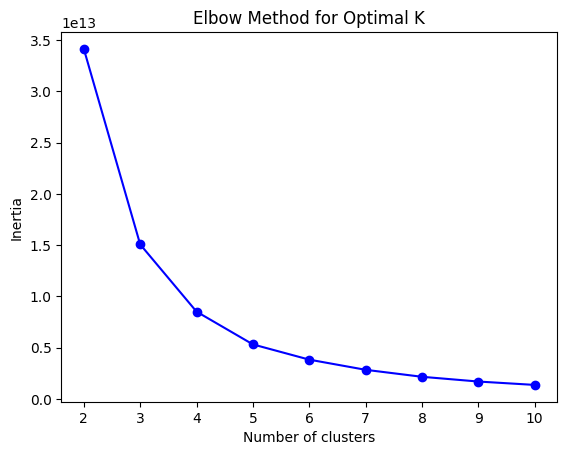

In [34]:
# ---- Step 3: Elbow Method for Optimal K ----
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load encoded data for clustering
df_scaled = pd.read_csv(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\encoded_data.csv')

K = range(2, 11)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    print(f"K={k} done")

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [35]:
# ---- Step 4: Silhouette Score for Validation ----
from sklearn.metrics import silhouette_score
import numpy as np

# Sample 10000 rows
sample_idx = np.random.choice(df_scaled.index, size=10000, replace=False)
sample_data = df_scaled.loc[sample_idx]

k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(sample_data)
    score = silhouette_score(sample_data, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

k = 2, Silhouette Score = 0.6276
k = 3, Silhouette Score = 0.5942
k = 4, Silhouette Score = 0.5683
k = 5, Silhouette Score = 0.5687
k = 6, Silhouette Score = 0.5483
k = 7, Silhouette Score = 0.5475
k = 8, Silhouette Score = 0.5530
k = 9, Silhouette Score = 0.5471
k = 10, Silhouette Score = 0.5409


In [36]:
import pandas as pd

# Load encoded data
df_encoded = pd.read_csv(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\encoded_data.csv')


In [ ]:
from sklearn.cluster import KMeans
import joblib

# Train final KMeans model ( decided k=5)
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_final.fit(df_encoded)

# Save KMeans model for user queries later
joblib.dump(kmeans_final, r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\kmeans_model.pkl')

# Predict and assign clusters
df_encoded['cluster'] = kmeans_final.predict(df_encoded)

# Save clustered encoded data
df_encoded.to_csv(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\encoded_clustered_data.csv', index=False)
print("✅ Final clustered data saved to encoded_clustered_data.csv")


✅ Final clustered data saved to encoded_clustered_data.csv


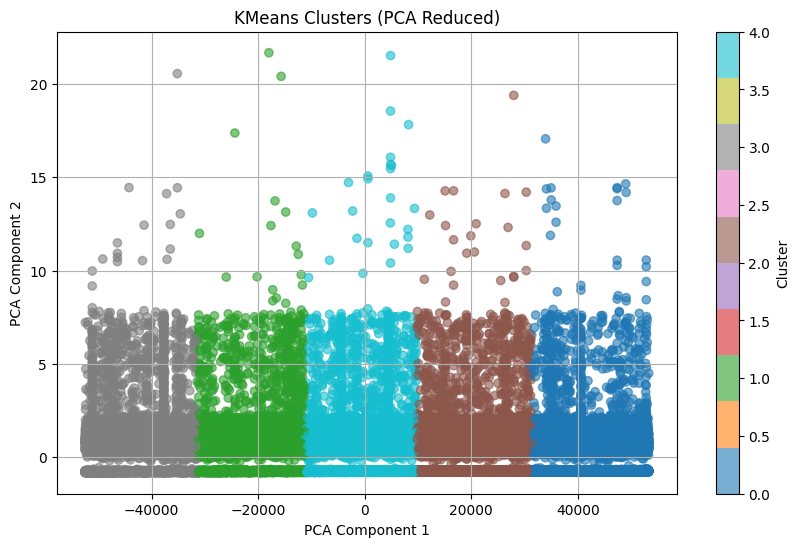

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load encoded data with clusters
df_clustered = df_encoded.copy()
# Drop cluster column for PCA
features_only = df_clustered.drop('cluster', axis=1)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(features_only)

# Add PCA results and cluster labels back to DataFrame
df_clustered['pca1'] = pca_result[:, 0]
df_clustered['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clustered['pca1'], df_clustered['pca2'], c=df_clustered['cluster'], cmap='tab10', alpha=0.6)
plt.title('KMeans Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


In [41]:
import pandas as pd
import joblib
import numpy as np

# Load encoded clustered dataset
df_encoded = pd.read_csv(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\encoded_clustered_data.csv')

# Load saved encoders and scaler
ohe_encoder = joblib.load(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\ohe_encoder.pkl')
scaler = joblib.load(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\scaler.pkl')
label_encoder_name = joblib.load(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\label_encoder_name.pkl')  # For possible future use
kmeans_model = joblib.load(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\kmeans_model.pkl')
df_cleaned = pd.read_csv(r'C:\Users\sures\OneDrive\Desktop\from_tuf_gaming\Swiggy_Recommendation_System\swiggy_dataset\cleaned_data.csv')
df_cleaned['cluster'] = df_encoded['cluster']
# Get encoded feature names
ohe_feature_names = ohe_encoder.get_feature_names_out(['place', 'city', 'cuisine_1', 'cuisine_2'])


In [50]:
def recommend_from_cleaned(place, city, cuisine='', name='', max_cost=None, rating_count_threshold=None, min_rating=None):
    try:
        place = place.strip().lower()
        city = city.strip().lower()
        cuisine = cuisine.strip().lower() if cuisine else ''
        name = name.strip().lower()

        # ---- Step 1: Encode input ----
        input_dict = {
            'place': [place],
            'city': [city],
            'cuisine_1': [cuisine],
            'cuisine_2': ['']
        }
        input_df = pd.DataFrame(input_dict)

        ohe_input_array = ohe_encoder.transform(input_df[['place', 'city', 'cuisine_1', 'cuisine_2']])
        ohe_input_df = pd.DataFrame(ohe_input_array, columns=ohe_feature_names)

        # Encode name
        if name:
            try:
                name_encoded_value = label_encoder_name.transform([name])[0]
            except ValueError:
                print(f"⚠️ '{name}' not found. Using 0 fallback.")
                name_encoded_value = 0
        else:
            name_encoded_value = 0

        # Scale numerical
        num_df = pd.DataFrame({
            'rating': [0],
            'rating_count': [0],
            'cost': [9999],
            'name_encoded': [name_encoded_value]
        })
        scaled_array = scaler.transform(num_df)
        scaled_df = pd.DataFrame(scaled_array, columns=['rating', 'rating_count', 'cost', 'name_encoded'])

        final_input = pd.concat([ohe_input_df, scaled_df], axis=1)

        # Predict cluster
        cluster_label = kmeans_model.predict(final_input)[0]
        print(f"\n🔎 Predicted Cluster: {cluster_label}")

        # ---- Step 2: Filter cleaned data ----
        filtered = df_cleaned[df_cleaned['cluster'] == cluster_label]

        # Apply place and city filters
        filtered = filtered[(filtered['place'] == place) & (filtered['city'] == city)]

        # Apply cuisine filter
        if cuisine:
            filtered = filtered[(filtered['cuisine_1'] == cuisine) | (filtered['cuisine_2'] == cuisine)]

        # Apply rating and cost thresholds
        if max_cost is not None:
            filtered = filtered[filtered['cost'] <= max_cost]
        if rating_count_threshold is not None:
            filtered = filtered[filtered['rating_count'] >= rating_count_threshold]
        if min_rating is not None:
            filtered = filtered[filtered['rating'] >= min_rating]

        if filtered.empty:
            print("\n⚠️ No matching restaurants found in filtered cluster.")
        else:
            print("\n🍽️ Top Restaurant Recommendations:")
            print(filtered[['name', 'place', 'city', 'cuisine_1', 'cuisine_2', 'rating', 'cost']].head(100))

    except Exception as e:
        print(f"❌ Error: {e}")


In [51]:
recommend_from_cleaned(place= 'velachery', city= 'chennai')


🔎 Predicted Cluster: 3

🍽️ Top Restaurant Recommendations:
                                     name      place     city       cuisine_1  \
38764                          cake waves  velachery  chennai          bakery   
38766        chili's american grill & bar  velachery  chennai        american   
38773          anand sweets and savouries  velachery  chennai          sweets   
38782                            anjappar  velachery  chennai       chettinad   
38788                         chai pettai  velachery  chennai       beverages   
...                                   ...        ...      ...             ...   
39179                        atti  square  velachery  chennai  middle eastern   
39180  ambur mubarak biriyani & fast food  velachery  chennai         biryani   
39184                   arabi sutta kozhi  velachery  chennai          indian   
39186                           bro pizza  velachery  chennai         italian   
39189             ab s-absolute barbecues  velach

In [52]:
recommend_from_cleaned(place= 'erode', city= 'erode')


🔎 Predicted Cluster: 3

🍽️ Top Restaurant Recommendations:
                                                   name  place   city  \
62651                             barbequeen restaurant  erode  erode   
62655                                           a2b veg  erode  erode   
62661                                        am briyani  erode  erode   
62671                                   annamar punjabi  erode  erode   
62682                     anjappar chettinad restaurant  erode  erode   
62687                                         boomerang  erode  erode   
62689                                      burger bytes  erode  erode   
62691                                      bhuvana mess  erode  erode   
62699                                      aps biriyani  erode  erode   
62704                                       burma foods  erode  erode   
62713                           boom boom fried chicken  erode  erode   
62725                              chicken only chicken  erode  

In [45]:
df['city'].unique()

array(['abohar', 'adilabad', 'adityapur', 'adoni', 'agartala', 'agra',
       'ahmedabad', 'ahmednagar', 'aizawl', 'ajmer', 'akola', 'alappuzha',
       'aligarh', 'alipurduar', 'allahabad', 'alwar', 'ambala',
       'ambikapur', 'ambur', 'amravati', 'amreli', 'amritsar', 'anand',
       'anantapur', 'ankleshwar', 'arakkonam', 'arambagh', 'arrah',
       'aruppukottai', 'asansol', 'aurangabad', 'aurangabad_bihar',
       'azamgarh', 'baddi', 'bagalkot', 'bagdogra', 'bahadurgarh',
       'bahraich', 'balaghat', 'balangir', 'balasore', 'ballari',
       'balrampur', 'balurghat', 'banda', 'bangalore',
       'new bel road,bangalore', 'bantwal', 'bapatlachirala', 'baramati',
       'baran', 'bardhaman', 'bardoli', 'bareilly', 'barmer', 'barnala',
       'barshi', 'barwani', 'basirhat', 'basti', 'batala', 'bathinda',
       'beawar', 'beed', 'begusarai', 'bela-pratapgarh', 'belgaum',
       'berhampore', 'berhampur', 'bettiah', 'betul', 'bhadohi',
       'bhadrachalam', 'bhagalpur', 'bhanda

In [46]:
df['place'].unique()

array(['abohar', 'adilabad', 'adityapur', 'adoni', 'agartala', 'agra',
       'vastrapur', 'gota', 'paldi & ambawadi', 'ghatlodia', 'bopal',
       'gandhinagar', 'laldarwaja', 'naranpura', 'navrangpura',
       'science city', 'maninagar', 'chandkheda', 'ahmednagar', 'aizawl',
       'ajmer', 'akola', 'alappuzha', 'aligarh', 'alipurduar',
       'allahabad', 'alwar', 'ambala', 'ambikapur', 'ambur', 'amravati',
       'amreli', 'amritsar', 'anand', 'anantapur', 'ankleshwar',
       'arakkonam', 'arambagh', 'arrah', 'aruppukottai', 'asansol',
       'aurangabad', 'aurangabad_bihar', 'azamgarh', 'baddi', 'bagalkot',
       'bagdogra', 'bahadurgarh', 'bahraich', 'balaghat', 'balangir',
       'balasore', 'ballari', 'balrampur', 'balurghat', 'banda',
       'yeshwanthpur', 'geddalahalli', 'koramangala', 'jp nagar',
       'mahadevpura', 'hsr', 'arekere', 'indiranagar', 'banashankari',
       'whitefield', 'nagavara & hennur', 'kammanahalli/kalyan nagar',
       'kumaraswamy layout & uttara

In [55]:
df_cleaned[(df_cleaned['name'] == 'kfc') & (df_cleaned['city'] == 'erode')]


,id,name,place,city,rating,rating_count,cost,cuisine_1,cuisine_2,link,cluster
62652,410258,kfc,erode,erode,4.0,952,450,american,snacks,https://www.swiggy.com/restaurants/kfc-erode-e...,4


In [47]:
df[df['city'] == 'erode']

,id,name,place,city,rating,rating_count,cost,cuisine_1,cuisine_2,link
62650,220269,kongu parota stall,erode,erode,3.9,4218,200,south indian,south indian,https://www.swiggy.com/restaurants/kongu-parot...
62651,224006,barbequeen restaurant,erode,erode,4.0,3781,300,south indian,chinese,https://www.swiggy.com/restaurants/barbequeen-...
62652,410258,kfc,erode,erode,4.0,952,450,american,snacks,https://www.swiggy.com/restaurants/kfc-erode-e...
62653,104235,taj hotel,erode,erode,3.7,991,300,grill,tandoor,https://www.swiggy.com/restaurants/taj-hotel-b...
62654,331659,mint and malli restaurant,erode,erode,4.0,3492,200,biryani,south indian,https://www.swiggy.com/restaurants/mint-and-ma...
...,...,...,...,...,...,...,...,...,...,...
62854,440036,kokkarakko biriyani & fast food,erode,erode,3.8,363,200,indian,indian,https://www.swiggy.com/restaurants/kokkarakko-...
62855,201638,jai new ramaraj bhavan,erode,erode,4.1,653,250,south indian,south indian,https://www.swiggy.com/restaurants/jai-new-ram...
62856,391202,raja restaurant,erode,erode,4.2,67,200,south indian,south indian,https://www.swiggy.com/restaurants/raja-restau...
62857,447270,madurai famous jigarthanda,erode,erode,4.0,43,150,beverages,beverages,https://www.swiggy.com/restaurants/madurai-fam...
